<a href="https://colab.research.google.com/github/reemalsubaiee/Random/blob/main/Well_Logging_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import lib.

In [38]:
# import lasio lab.

!pip install lasio


In [3]:
#import nessecary libraries

import pandas as pd
import matplotlib.pyplot as plt

import lasio

las = lasio.read("marauder_2_pex_repeat.las")

## Shows logs and delete unwanted logs

In [39]:
#shows what are the section in the las file
las.sections.keys()


dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

In [ ]:
#delete unwanted logs from the file

las.delete_curve('HMIN')
las.delete_curve('HMNO')
las.delete_curve('TNPH_DOL')
las.delete_curve('TNPH_LIM')
las.delete_curve('TNPH_SAN')
las.delete_curve('RXO_HRLT')
las.delete_curve('P1AZ')
las.delete_curve('NPOR')


In [31]:
#show the logs in the file with units and description
for curve in las.curves:
  print (f"Curve: {curve.mnemonic},   \t\t Units: {curve.unit},  \t\t\t Description: {curve.descr}")

Curve: DEPT,   		 Units: M,  			 Description: DEPTH (BOREHOLE) {F10.4}
Curve: BS,   		 Units: IN,  			 Description: Bit Size {F13.4}
Curve: C1,   		 Units: IN,  			 Description: Caliper 1 {F13.4}
Curve: C2,   		 Units: IN,  			 Description: Caliper 2 {F13.4}
Curve: ECGR,   		 Units: GAPI,  			 Description: Environmentally Corrected Gamma Ray {F13.4}
Curve: GR,   		 Units: GAPI,  			 Description: Gamma Ray {F13.4}
Curve: GTEM,   		 Units: DEGC,  			 Description: Generalized Borehole Temperature {F13.4}
Curve: HDRA,   		 Units: G/C3,  			 Description: Density Standoff Correction {F13.4}
Curve: HTNP,   		 Units: V/V,  			 Description: High Resolution Thermal Neutron Porosity (Ratio Method) in Selected Lithology {F13.4}
Curve: NPHI_DOL,   		 Units: V/V,  			 Description: Thermal Neutron Porosity (Ratio Method) (matrix Dolomite) {F13.4}
Curve: NPHI_LIM,   		 Units: V/V,  			 Description: Thermal Neutron Porosity (Ratio Method) (matrix Limestone) {F13.4}
Curve: NPHI_SAN,   		 Units: V/V,  		

# Convert las to pandas and plot data

In [32]:
#convert las file to pandas inorder to plot and do other stuff
well=las.df()

In [33]:
#shows table of the first 5 rows of data with headers
well.head

<bound method NDFrame.head of             BS      C1      C2     ECGR       GR     GTEM    HDRA    HTNP  \
DEPT                                                                        
1780.0320  8.5  8.3596  8.6085  78.0895  77.1677  90.1255  0.0051  0.2082   
1780.0828  8.5  8.3596  8.6085  77.3814  76.4606  90.1272 -0.0013  0.2026   
1780.1336  8.5  8.3596  8.6085  76.6733  75.7534  90.1289 -0.0018  0.2056   
1780.1844  8.5  8.3596  8.6085  75.9652  75.0463  90.1306 -0.0019  0.2112   
1780.2352  8.5  8.3596  8.6085  76.5568  75.6156  90.1323 -0.0018  0.2130   
...        ...     ...     ...      ...      ...      ...     ...     ...   
1879.3460  8.5  8.1503  8.2395  50.7985  51.2008  93.4795  0.0206  0.1968   
1879.3968  8.5  8.1456  8.2372  50.4240  50.8463  93.4812  0.0211  0.1961   
1879.4476  8.5  8.1503  8.2372  50.7625  51.2097  93.4830  0.0196  0.1982   
1879.4984  8.5  8.1599  8.2462  51.1010  51.5732  93.4847  0.0190  0.2026   
1879.5492  8.5  8.1527  8.2440  51.4395  51.93

In [34]:
#shows how many non-null values and data type

well.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1960 entries, 1780.032 to 1879.5492
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BS        1960 non-null   float64
 1   C1        1960 non-null   float64
 2   C2        1960 non-null   float64
 3   ECGR      1960 non-null   float64
 4   GR        1960 non-null   float64
 5   GTEM      1960 non-null   float64
 6   HDRA      1960 non-null   float64
 7   HTNP      1960 non-null   float64
 8   NPHI_DOL  1960 non-null   float64
 9   NPHI_LIM  1960 non-null   float64
 10  NPHI_SAN  1960 non-null   float64
 11  PEF8      1960 non-null   float64
 12  RHO8      1960 non-null   float64
 13  RM_HRLT   1960 non-null   float64
 14  RT_HRLT   1960 non-null   float64
 15  RXO8      1960 non-null   float64
 16  RXOZ      1960 non-null   float64
 17  SP        1960 non-null   float64
dtypes: float64(18)
memory usage: 290.9 KB


In [37]:
#Shows statical info about data

well.describe()


,BS,C1,C2,ECGR,GR,GTEM,HDRA,HTNP,NPHI_DOL,NPHI_LIM,NPHI_SAN,PEF8,RHO8,RM_HRLT,RT_HRLT,RXO8,RXOZ,SP
count,1960.0,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000,1960.000000
mean,8.5,8.233247,8.380036,73.135090,73.011512,91.805859,0.003335,0.240701,0.133595,0.207418,0.249086,2.362826,2.423441,0.087772,21.336497,5.890910,5.689643,-13.155170
std,0.0,0.174065,0.213332,27.988761,27.583310,0.970899,0.012968,0.039258,0.035897,0.032876,0.033162,0.434839,0.090395,0.007272,10.996233,4.178780,3.898451,42.821212
min,8.5,7.727000,7.973900,23.830900,24.070000,90.125500,-0.014200,0.163900,0.067200,0.140900,0.182000,1.635400,2.206700,0.072400,4.175500,0.968800,0.985500,-86.953100
25%,8.5,8.076600,8.194500,47.668625,48.419800,90.965675,-0.005400,0.211800,0.106975,0.183175,0.224600,1.929125,2.338750,0.081800,13.924200,2.033675,2.025250,-46.240250
50%,8.5,8.284100,8.352000,77.489400,77.191850,91.805950,-0.001150,0.236950,0.129850,0.205050,0.246650,2.447200,2.441950,0.088700,19.449000,5.127500,4.983150,-19.667550
75%,8.5,8.359600,8.608500,96.056050,95.417925,92.645925,0.007725,0.264400,0.155275,0.228350,0.270150,2.725050,2.499225,0.093700,28.084800,8.942825,8.567775,31.867475
max,8.5,8.566600,8.734500,139.557400,140.215000,93.486400,0.050100,0.354900,0.257000,0.309600,0.355600,3.554500,2.603400,0.100600,68.609200,26.767200,24.422600,65.608100


<Axes: xlabel='DEPT'>

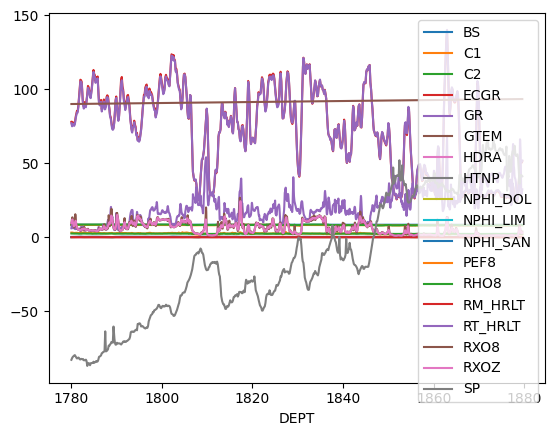

In [40]:
#plot data in y and x format

well.plot()

<Axes: xlabel='DEPT'>

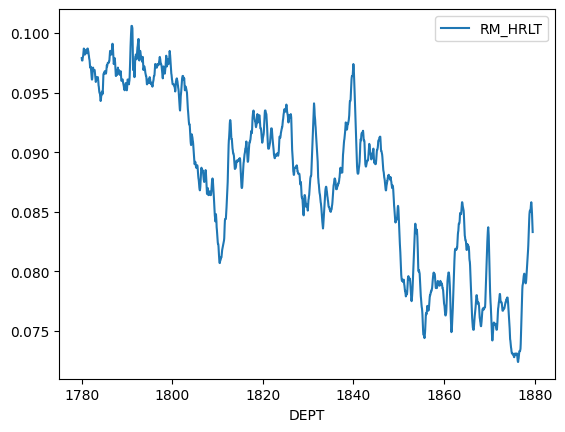

In [42]:
#plot one specific log

well.plot(y='RM_HRLT')